# Comparaciones, máscaras y lógica booleana

Este capítulo cubre el uso de máscaras booleanas para examinar y manipular valores dentro de matrices NumPy.
El enmascaramiento aparece cuando desea extraer, modificar, contar o manipular valores en una matriz según algún criterio: por ejemplo, es posible que desee contar todos los valores mayores que un determinado valor o eliminar todos los valores atípicos que estén por encima de algún umbral. .
En NumPy, el enmascaramiento booleano suele ser la forma más eficaz de realizar este tipo de tareas.

## Ejemplo: contar los días lluviosos

Imagine que tiene una serie de datos que representan la cantidad de precipitación diaria durante un año en una ciudad determinada.
Por ejemplo, aquí cargaremos las estadísticas de lluvia diarias para la ciudad de Seattle en 2015, usando Pandas (ver [Parte 3](03.00-Introducción-a-Pandas.ipynb)):

In [1]:
import numpy as np
from vega_datasets import data

# Use DataFrame operations to extract rainfall as a NumPy array
rainfall_mm = np.array(
    data.seattle_weather().set_index('date')['precipitation']['2015'])
len(rainfall_mm)

365

La matriz contiene 365 valores, que muestran la precipitación diaria en milímetros desde el 1 de enero hasta el 31 de diciembre de 2015.

Como primera visualización rápida, veamos el histograma de días lluviosos en la siguiente figura, que se generó usando Matplotlib (exploraremos esta herramienta más a fondo en la [Parte 4](04.00-Introducción-a-Matplotlib.ipynb)):

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

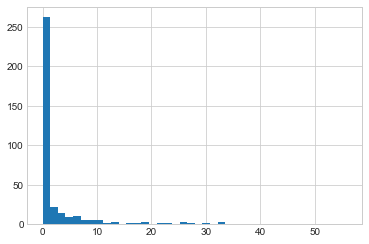

In [3]:
plt.hist(rainfall_mm, 40);

Este histograma nos da una idea general de cómo se ven los datos: a pesar de la reputación lluviosa de la ciudad, la gran mayoría de los días en Seattle tuvieron precipitaciones medidas casi nulas en 2015.
Pero esto no logra transmitir cierta información que nos gustaría ver: por ejemplo, ¿cuántos días de lluvia hubo en el año? ¿Cuál fue la precipitación promedio en esos días lluviosos? ¿Cuántos días hubo con más de 10 mm de lluvia?

Un enfoque para esto sería responder estas preguntas manualmente: podríamos recorrer los datos, incrementando un contador cada vez que veamos valores en algún rango deseado.
Pero por razones analizadas a lo largo de este capítulo, este enfoque es muy ineficiente desde el punto de vista del tiempo de escritura del código y del tiempo de cálculo del resultado.
Vimos en [Cálculo en matrices NumPy: funciones universales] (02.03-Computación-en-arrays-ufuncs.ipynb) que las ufuncs de NumPy se pueden usar en lugar de bucles para realizar operaciones aritméticas rápidas de elementos en matrices; de la misma manera, podemos usar otras ufuncs para hacer *comparaciones* de elementos sobre matrices, y luego podemos manipular los resultados para responder las preguntas que tengamos.
Dejaremos los datos a un lado por ahora y discutiremos algunas herramientas generales en NumPy para usar *enmascaramiento* para responder rápidamente este tipo de preguntas.

## Operadores de comparación como Ufuncs

[Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) introdujo ufuncs y se centró en particular en los operadores aritméticos. Vimos que el uso de `+`, `-`, `*`, `/` y otros operadores en matrices conduce a operaciones de elementos.
NumPy también implementa operadores de comparación como `<` (menor que) y `>` (mayor que) como ufuncs de elementos.
El resultado de estos operadores de comparación es siempre una matriz con un tipo de datos booleano.
Las seis operaciones de comparación estándar están disponibles:

In [4]:
x = np.array([1, 2, 3, 4, 5])

In [5]:
x < 3  # less than

array([ True,  True, False, False, False])

In [6]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [7]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [8]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [9]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [10]:
x == 3  # equal

array([False, False,  True, False, False])

También es posible hacer una comparación por elementos de dos matrices e incluir expresiones compuestas:

In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

Como en el caso de los operadores aritméticos, los operadores de comparación se implementan como ufuncs en NumPy; por ejemplo, cuando escribe `x <3`, internamente NumPy usa `np.less(x, 3)`.
    A continuación se muestra un resumen de los operadores de comparación y sus ufuncs equivalentes:

| Operador | Ufunc equivalente | Operador | Ufunc equivalente |
|-------------|-------------------|------------|-- ----------------|
|`==` |`np.equal` |`!=` |`np.not_equal` |
|`<` |`np.less` |`<=` |`np.less_equal` |
|`>` |`np.greater` |`>=` |`np.greater_equal`|

Al igual que en el caso de las ufuncs aritméticas, funcionarán en matrices de cualquier tamaño y forma.
Aquí hay un ejemplo bidimensional:

In [12]:
rng = np.random.default_rng(seed=1701)
x = rng.integers(10, size=(3, 4))
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [13]:
x < 6

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

En cada caso, el resultado es una matriz booleana y NumPy proporciona una serie de patrones sencillos para trabajar con estos resultados booleanos.

## Trabajar con matrices booleanas

Dada una matriz booleana, hay una gran cantidad de operaciones útiles que puedes realizar.
Trabajaremos con `x`, la matriz bidimensional que creamos anteriormente:

In [14]:
print(x)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]


### Contando entradas

Para contar el número de entradas "True" en una matriz booleana, "np.count_nonzero" es útil:

In [15]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

Vemos que hay ocho entradas de la matriz que son menores que 6.
Otra forma de obtener esta información es utilizar `np.sum`; en este caso, "Falso" se interpreta como "0" y "Verdadero" se interpreta como "1":

In [16]:
np.sum(x < 6)

8

El beneficio de `np.sum` es que, al igual que con otras funciones de agregación de NumPy, esta suma también se puede realizar en filas o columnas:

In [17]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([3, 2, 3])

Esto cuenta el número de valores menores de 6 en cada fila de la matriz.

Si estamos interesados ​​en comprobar rápidamente si alguno o todos los valores son "Verdadero", podemos usar (lo has adivinado) "np.any" o "np.all":

In [18]:
# are there any values greater than 8?
np.any(x > 8)

True

In [19]:
# are there any values less than zero?
np.any(x < 0)

False

In [20]:
# are all values less than 10?
np.all(x < 10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

`np.all` y `np.any` también se pueden usar a lo largo de ejes particulares. Por ejemplo:

In [22]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([False, False,  True])

Aquí todos los elementos de la tercera fila son menos de 8, mientras que en otros no ocurre lo mismo.

Finalmente, una advertencia rápida: como se menciona en [Agregaciones: mín., máx. y todo lo demás](02.04-Computation-on-arrays-aggregates.ipynb), Python tiene `suma`, `cualquiera` y ` incorporados todas las funciones. Tienen una sintaxis diferente a la de las versiones de NumPy y, en particular, fallarán o producirán resultados no deseados cuando se utilicen en matrices multidimensionales. ¡Asegúrese de utilizar `np.sum`, `np.any` y `np.all` para estos ejemplos!

### Operadores booleanos

Ya hemos visto cómo podemos contar, digamos, todos los días con menos de 20 mm de lluvia o todos los días con más de 10 mm de lluvia.
Pero ¿y si queremos saber cuántos días hubo con más de 10 mm y menos de 20 mm de lluvia? Podemos lograr esto con los *operadores lógicos bit a bit* de Python, `&`, `|`, `^` y `~`.
Al igual que con los operadores aritméticos estándar, NumPy los sobrecarga como ufuncs que funcionan por elementos en matrices (generalmente booleanas).

Por ejemplo, podemos abordar este tipo de pregunta compuesta de la siguiente manera:

In [23]:
np.sum((rainfall_mm > 10) & (rainfall_mm < 20))

16

Esto nos dice que fueron 16 días con precipitaciones de entre 10 y 20 milímetros.

Los paréntesis aquí son importantes. Debido a las reglas de precedencia de operadores, sin los paréntesis, esta expresión se evaluaría de la siguiente manera, lo que genera un error:

``` pitón
lluvia_mm > (10 y lluvia_mm) < 20
```

Demostremos una expresión más complicada. Usando las leyes de De Morgan, podemos calcular el mismo resultado de manera diferente:

In [24]:
np.sum(~( (rainfall_mm <= 10) | (rainfall_mm >= 20) ))

16

La combinación de operadores de comparación y operadores booleanos en matrices puede generar una amplia gama de operaciones lógicas eficientes.

La siguiente tabla resume los operadores booleanos bit a bit y sus ufuncs equivalentes:

| Operador | Ufunc equivalente | Operador | Ufunc equivalente |
|-------------|-------------------|-------------|- ------------------|
|`&` |`np.bitwise_and` ||       |`np.bitwise_or` |
|`^` |`np.bitwise_xor` |`~` |`np.bitwise_not` |

Con estas herramientas, podemos empezar a responder muchas de las preguntas que podamos tener sobre nuestros datos meteorológicos.
A continuación se muestran algunos ejemplos de resultados que podemos calcular al combinar enmascaramiento con agregaciones:

In [25]:
print("Number days without rain:  ", np.sum(rainfall_mm == 0))
print("Number days with rain:     ", np.sum(rainfall_mm != 0))
print("Days with more than 10 mm: ", np.sum(rainfall_mm > 10))
print("Rainy days with < 5 mm:    ", np.sum((rainfall_mm > 0) &
                                            (rainfall_mm < 5)))

Number days without rain:   221
Number days with rain:      144
Days with more than 10 mm:  34
Rainy days with < 5 mm:     83


## Matrices booleanas como máscaras

En la sección anterior analizamos los agregados calculados directamente en matrices booleanas.
Un patrón más potente es utilizar matrices booleanas como máscaras para seleccionar subconjuntos particulares de los propios datos. Volvamos a nuestra matriz `x` de antes:

In [26]:
x

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

Supongamos que queremos una matriz de todos los valores de la matriz que sean menores que, digamos, 5. Podemos obtener una matriz booleana para esta condición fácilmente, como ya hemos visto:

In [27]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

Ahora, para *seleccionar* estos valores de la matriz, simplemente podemos indexar esta matriz booleana; esto se conoce como operación de *enmascaramiento*:

In [28]:
x[x < 5]

array([4, 0, 3, 3, 1, 3, 4, 0])

Lo que se devuelve es una matriz unidimensional rellena con todos los valores que cumplen esta condición; en otras palabras, todos los valores en posiciones en las que la matriz de máscara es "Verdadera".

Entonces somos libres de operar según estos valores como queramos.
Por ejemplo, podemos calcular algunas estadísticas relevantes sobre nuestros datos de lluvia de Seattle:

In [29]:
# construct a mask of all rainy days
rainy = (rainfall_mm > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2015 (mm):   ",
      np.median(rainfall_mm[rainy]))
print("Median precip on summer days in 2015 (mm):  ",
      np.median(rainfall_mm[summer]))
print("Maximum precip on summer days in 2015 (mm): ",
      np.max(rainfall_mm[summer]))
print("Median precip on non-summer rainy days (mm):",
      np.median(rainfall_mm[rainy & ~summer]))

Median precip on rainy days in 2015 (mm):    3.8
Median precip on summer days in 2015 (mm):   0.0
Maximum precip on summer days in 2015 (mm):  32.5
Median precip on non-summer rainy days (mm): 4.1


Al combinar operaciones booleanas, operaciones de enmascaramiento y agregados, podemos responder muy rápidamente a este tipo de preguntas sobre nuestro conjunto de datos.

## Uso de las palabras clave y/o frente a los operadores &/|

Un punto común de confusión es la diferencia entre las palabras clave "y" y "o" por un lado, y los operadores "&" y "|" por el otro.
¿Cuándo usarías uno versus el otro?

La diferencia es esta: `y` y `o` operan sobre el objeto como un todo, mientras que `&` y `|` operan sobre los elementos dentro del objeto.

Cuando usa "y" o "o", es equivalente a pedirle a Python que trate el objeto como una única entidad booleana.
En Python, todos los números enteros distintos de cero se evaluarán como "Verdadero". De este modo:

In [30]:
bool(42), bool(0)

(True, False)

In [31]:
bool(42 and 0)

False

In [32]:
bool(42 or 0)

True

Cuando usas `&` y `|` en números enteros, la expresión opera en la representación bit a bit del elemento, aplicando *y* o *o* a los bits individuales que componen el número:

In [33]:
bin(42)

'0b101010'

In [34]:
bin(59)

'0b111011'

In [35]:
bin(42 & 59)

'0b101010'

In [36]:
bin(42 | 59)

'0b111011'

Observe que los bits correspondientes de la representación binaria se comparan para obtener el resultado.

Cuando tiene una matriz de valores booleanos en NumPy, puede considerarlo como una cadena de bits donde `1 = True` y `0 = False`, y `&` y `|` funcionarán de manera similar a los ejemplos anteriores. :

In [37]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

Pero si usa `o` en estas matrices, intentará evaluar la verdad o falsedad de todo el objeto de la matriz, que no es un valor bien definido:

In [38]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

De manera similar, al evaluar una expresión booleana en una matriz determinada, debes usar `|` o `&` en lugar de `o` o `and`:

In [39]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

Intentar evaluar la verdad o falsedad de toda la matriz dará el mismo `ValueError` que vimos anteriormente:

In [40]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Entonces, recuerde esto: `y` y `o` realizan una única evaluación booleana en un objeto completo, mientras que `&` y `|` realizan múltiples evaluaciones booleanas en el contenido (los bits o bytes individuales) de un objeto.
Para matrices booleanas NumPy, esta última es casi siempre la operación deseada.